![cinta.png](attachment:cinta.png)

![logo.png](attachment:logo.png)

# Práctica 1 segunda parte
### **Equipo 2**

- Arturo Bringas (Acturio)

- Aide González (AideJGC)

- Lizzy Gamboa (KaLizzyGam)

- Yusuri Arciga (YusuriAR)


In [2]:
import numpy as np
import math
import networkx as nx
import matplotlib.pyplot as plt

### Objetivo:

El objetivo de esta práctica es construir un grafo con pesos en sus *edges* y obtener una matriz de adyacencias que sea simétrica, por ejemplo:

In [3]:
nodes_for_matrix=np.array([[0, 0, 1/2],
 [0, 1, 2],
 [1, 0, 2],
 [0, 2, 3],
 [2, 0, 3],
 [0, 3, 5],
 [3, 0, 5],
 [0, 4, 7],
 [4, 0, 7],
 [1, 1, 1/3],
 [1, 2, 11],
 [2, 1, 11],
 [1, 3, 13],
 [3, 1, 13],
 [1, 4, 17],
 [4, 1, 17],
 [2, 2, 1/5],
 [2, 3, 19],
 [3, 2, 19],
 [2, 4, 23],
 [4, 2, 23],
 [3, 3, 1/7],
 [3, 4, 29],
 [4, 3, 29],
 [4, 4, 1/11]])

print(nodes_for_matrix)

[[ 0.          0.          0.5       ]
 [ 0.          1.          2.        ]
 [ 1.          0.          2.        ]
 [ 0.          2.          3.        ]
 [ 2.          0.          3.        ]
 [ 0.          3.          5.        ]
 [ 3.          0.          5.        ]
 [ 0.          4.          7.        ]
 [ 4.          0.          7.        ]
 [ 1.          1.          0.33333333]
 [ 1.          2.         11.        ]
 [ 2.          1.         11.        ]
 [ 1.          3.         13.        ]
 [ 3.          1.         13.        ]
 [ 1.          4.         17.        ]
 [ 4.          1.         17.        ]
 [ 2.          2.          0.2       ]
 [ 2.          3.         19.        ]
 [ 3.          2.         19.        ]
 [ 2.          4.         23.        ]
 [ 4.          2.         23.        ]
 [ 3.          3.          0.14285714]
 [ 3.          4.         29.        ]
 [ 4.          3.         29.        ]
 [ 4.          4.          0.09090909]]


<br>

Tenemos nodos con números del $0$ al $4$ y con pesos en sus *edges* dados por la tercera entrada de las tuplas anteriores. 

El grafo se ve como sigue:

<function matplotlib.pyplot.show>

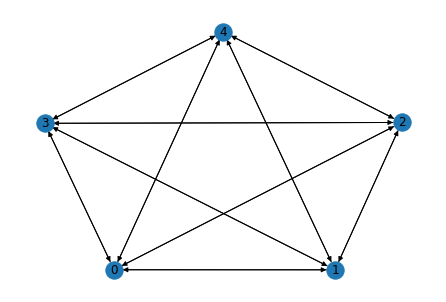

In [4]:
G = nx.DiGraph()
G.add_edges_from([(0, 1), (0,2), (0,3), (0,4), 
                  (1,0), (1,2), (1,3), (1,4),
                  (2,0), (2,1), (2,3), (2,4),
                  (3,0), (3,1), (3,2), (3,4),
                  (4,0), (4,1), (4,2), (4,3),])
nx.draw(G,with_labels=True)
plt.show

(se omitieron los pesos de sus *edges*)

La matriz de adyacencias es:

In [5]:
def mat_ad (N=nodes_for_matrix):
  """
  Función que devuelve la matriz de adyacencia de una matriz simétrica con 
  nodos y sus pesos asociados en la tercera entrada de las tuplas
  Args: Matriz de nodos
  Regresa: Matriz simétrica de adyacencia
  """
  AD = dict()
  for i in range(0,len(N)): 
    AD[(int(N[[i],[0]]), int(N[[i],[1]]))] = float(N[[i],[2]])
  dim= int(np.sqrt(len(N)))
  f=list()
  mat=list()
  for j in range(0, dim): 
    for i in range(0, dim):
      x=AD.get((j,i))
      f.append(x)
      f=f[-dim:]
    mat.append(f[0:dim])
  return(np.array(mat))

#https://stackoverflow.com/questions/5944708/how-to-force-a-list-to-a-fixed-size

In [6]:
mat = mat_ad(nodes_for_matrix)
print(mat)

[[ 0.5         2.          3.          5.          7.        ]
 [ 2.          0.33333333 11.         13.         17.        ]
 [ 3.         11.          0.2        19.         23.        ]
 [ 5.         13.         19.          0.14285714 29.        ]
 [ 7.         17.         23.         29.          0.09090909]]


<br>
La cual es simétrica. Hay que aproximar todos los eigenvalores y eigenvectores de la matriz de adyacencias utilizando el algoritmo QR en el que se **debe programar** la factorización QR con reflexiones de Householder. El programa devuelve $Q$ y $R$. Muestren una visualización de su grafo en el reporte con los pesos de sus *edges* usando pocos decimales (p.ej. 2). 

In [54]:
def grafo_mat(N=nodes_for_matrix):
  """
  Función que genera el grafo de una matriz simétrica.
  Args: Matriz con nodos y sus pesos asociados en la tercera entrada de las tuplas.
  Regresa: Grafo con peso en los edges.
  """
  G = nx.DiGraph()
  AD = dict()
  for i in range(0, len(N)):
      AD[(int(N[[i],[0]]), int(N[[i],[1]]))] = round(float(N[[i],[2]]),2)
      if (int(N[[i],[0]]) != int(N[[i],[1]])):
        G.add_weighted_edges_from([(int(N[[i],[0]]), int(N[[i],[1]]), round(float(N[[i],[2]]),2))]) 
          
  pos = nx.spring_layout(G, seed=47)
    
  lb=nx.draw_networkx_edge_labels(G,pos, edge_labels=AD, font_color='blue')
   
  nx.draw(G, pos, with_labels=True, node_size=900)

  return plt.show



<function matplotlib.pyplot.show>

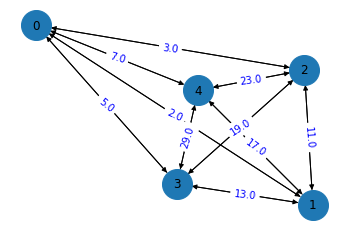

In [55]:
grafo_mat(nodes_for_matrix)


## ***Solución***

**Parte 1: Aproximar todos los eigenvalores y eigenvectores de la matriz de adyacencias utilizando el algoritmo QR en el que se debe programar la factorización QR con reflexiones de Householder. El programa devuelve $Q$ y $R$.**

Primero se calculará la factorización $Q$ y $R$ con reflexiones de Householder, se hace el desarrollo visto en clase para comprobar salidas en la programación de la función

In [336]:
A = mat

l_betas = []
l_v_Householder = []

row, col = mat.shape
print(row, col)
e1 = np.zeros(col)
print(e1)
e1[0] = 1
print(e1)
v = A[:,0] - np.linalg.norm(A[:,0])*e1
print('v: ',v)
beta = 2/v.dot(v)
print(beta)
l_betas.append(beta)
l_v_Householder.append(v)
A1 = A[:,0:]-beta*np.outer(v,v.dot(A[:,0:]))
print('a1\n',A1)

print(np.linalg.norm(A1[:,0]))
print(np.linalg.norm(A[:,0]))

# Trabajando la segunda columna
e1 = np.zeros(col-1)
print(e1)
e1[0] = 1
print(e1)
v = A1[1:,1] + np.linalg.norm(A1[1:,1])*e1
print('v: ',v)
beta = 2/v.dot(v)
print(beta)
l_betas.append(beta)
l_v_Householder.append(v)
print(A1[1:,1] - beta*v*v.dot(A1[1:,1]))
A2_aux = A1[1:,1:]-beta*np.outer(v,v.dot(A1[1:,1:]))
print('a2\n',A2_aux)

# Trabajando la tercera columna
e1 = np.zeros(col-2)
print(e1)
e1[0] = 1
print(e1)
v = A2_aux[1:,1] + np.linalg.norm(A2_aux[1:,1])*e1
print('v: ',v)
beta = 2/v.dot(v)
print(beta)
l_betas.append(beta)
l_v_Householder.append(v)
print(A2_aux[1:,1] - beta*v*v.dot(A2_aux[1:,1]))
A3_aux = A2_aux[1:,1:]-beta*np.outer(v,v.dot(A2_aux[1:,1:]))
print('a31\n',A3_aux)

# Trabajando la cuarta columna
e1 = np.zeros(col-3)
print(e1)
e1[0] = 1
print(e1)
v = A3_aux[1:,1] + np.linalg.norm(A3_aux[1:,1])*e1
print('v: ',v)
beta = 2/v.dot(v)
print(beta)
l_betas.append(beta)
l_v_Householder.append(v)
print(A3_aux[1:,1] - beta*v*v.dot(A3_aux[1:,1]))
A4_aux = A3_aux[1:,1:]-beta*np.outer(v,v.dot(A3_aux[1:,1:]))
print('a4\n',A4_aux)

print('\n\n-------------------')
# Entonces sólo falta colocar los renglones y columnas para tener a la matriz A(3). 
# Para esto combinamos columnas y renglones en numpy con column_stack y row_stack:

number_of_zeros = row-3
print('number_of_zeros:',(np.zeros(number_of_zeros)))
print('A4_aux:',A4_aux)

A4_aux_2 = np.column_stack((np.zeros(number_of_zeros), A4_aux)) 
print('A4_aux_2\n: ',A4_aux_2)

A4_aux_3 = np.row_stack((A3_aux[0, 0:], A4_aux_2))
print('A4_aux_3\n: ',A4_aux_3)

number_of_zeros = row-2
A4_aux_4 = np.column_stack((np.zeros(number_of_zeros), A4_aux_3)) 
print('A4_aux_4\n: ',A4_aux_4)

A4_aux_5 = np.row_stack((A2_aux[0, 0:], A4_aux_4))
print('A4_aux_5\n: ',A4_aux_5)

number_of_zeros = row-1
A4_aux_6 = np.column_stack((np.zeros(number_of_zeros), A4_aux_5)) 
print('A4_aux_6\n: ',A4_aux_6)

A5 = np.row_stack((A1[0, 0:], A4_aux_6))
print('A5\n',A5)

# Comprobando
print('-------------------Comprobando lib---------------------------')
q,r = np.linalg.qr(A)
print("Q:")
print(q)
print("R:")
print(r)

print('-------------------Comprobando hous---------------------------')

print('\nBetas\n',l_betas)
print('\nV-HUos\n',l_v_Householder)
print('\nBetas len\n',len(l_betas))

#print('\nR\n')
#A5 = np.row_stack((A1[0, 0:], A4_aux_6))
#print('\nA5\n',A5)

print('\nQ\n')
Q_Householder = np.eye(row)
print(Q_Householder)
print(col)
m = col
for j in range(col-2,-1,-1):
    print(j)
    v = l_v_Householder[j]
    print(v)
    print(Q_Householder[j:m,j:m])
    Q_Householder[j:m, j:m] = Q_Householder[j:m, j:m] - l_betas[j]*np.outer(v, v.dot(Q_Householder[j:m,j:m]))

print(Q_Householder)



5 5
[0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0.]
v:  [-8.84077085  2.          3.          5.          7.        ]
0.012109526123646193
a1
 [[ 9.34077085e+00  2.34099166e+01  2.99868185e+01  3.09625716e+01
   2.69931002e+01]
 [ 4.44089210e-16 -4.51011686e+00  4.89491732e+00  7.12662719e+00
   1.24770686e+01]
 [ 8.88178420e-16  3.73482471e+00 -8.95762402e+00  1.01899408e+01
   1.62156028e+01]
 [ 1.77635684e-15  8.91374524e-01  3.73729329e+00 -1.45405749e+01
   1.76926714e+01]
 [ 8.88178420e-16  4.79243335e-02  1.63221061e+00  8.44319516e+00
  -1.57393510e+01]]
9.340770846134701
9.340770846134703
[0. 0. 0. 0.]
[1. 0. 0. 0.]
v:  [1.41330403 3.73482471 0.89137452 0.04792433]
0.11945155579446508
[-5.92342089e+00  2.22044605e-15  5.55111512e-16  2.77555756e-17]
a2
 [[-5.92342089e+00  8.79935008e+00  1.12109917e+00 -3.25924765e+00]
 [ 2.22044605e-15  1.36030594e+00 -5.68038435e+00 -2.53694924e+01]
 [ 5.55111512e-16  6.19982918e+00 -1.83282770e+01  7.76773586e+00]
 [ 3.46944695e-17  1.76460770e+00  8.239

<br>

Se observa que se necesitará crear una función para crear vectores $e$ que nos permitan hacer ceros debajo de la columna

In [337]:
def vect_ini(col):
    """
    Se construye el vector que servira para ceros en las entradas 
    debajo de la primera entrada de la primera columna de la matriz A
    Args:
        col: tamaño del vector
    Regresa:
        vector con 1 en la primera posición y elementos cero en las demás posiciones
    """
    e1 = a = np.zeros(col)
    e1[0] = 1
    return e1

Probando la función

In [338]:
columnas = 5
e1 = vect_ini(columnas)
print(e1)

[1. 0. 0. 0. 0.]


<br>

Ahora se programa la factorización QR con reflexiones de Householder.

In [339]:
def factorizacion_qr_hh(A):
    """
    Calcula la factorización QR de una matriz usando las refexiones de housholder
    Args:
        A (Matrix): matriz a obtener una matriz superior
    Regresa:
        Q (Matrix): matriz Q
        R (Matrix): matriz R
    """
    # Declaracón de lista a utilizar para guardar a las partes esenciales del vector de Householder y las betas.
    l_betas = []
    l_v_Householder = []
    # Se obtienen las dimensiones de la matriz de entrada
    row, col = A.shape
    # Se construye el vector que servira para ceros en las entradas debajo de la primera columna de la matriz A
    e1 = vect_ini(row)
    # Obteniendo el vector housholder y las betas, y almacenando iterativamente
    # Primera columna
    v = A[:,0] - np.linalg.norm(A[:,0])*e1
    beta = 2/v.dot(v)
    l_betas.append(beta)
    l_v_Householder.append(v)
    # Modificando el primer renglón de la matriz
    Aux = []
    Aux.append(A[:,0:]-beta*np.outer(v,v.dot(A[:,0:])))
    # Columnas subsecuentes    
    for i in range(0, row-2):
        e1 = vect_ini(row-i-1)
        v = Aux[i][1:,1] + np.linalg.norm(Aux[i][1:,1])*e1
        beta = 2/v.dot(v)
        l_betas.append(beta)
        l_v_Householder.append(v)
        Aux.append(Aux[i][1:,1:]-beta*np.outer(v,v.dot(Aux[i][1:,1:])))
        
    # Colocando renglones y columnas para tener a la matriz A(5). 
    # Para esto combinamos columnas y renglones en numpy con column_stack y row_stack:
    A5 = []
    num = len(Aux)
    #print('num:',num)
    number_of_zeros = (row-(len(l_betas)-1))     
    A5.append(np.column_stack((np.zeros(number_of_zeros), Aux[num-1])))
    
    for i in range(0, row-2):
        A5.append(np.row_stack((Aux[num-(2+i)][0, 0:], A5[(len(A5)-1)])))
        number_of_zeros = (row-(len(l_betas)-(2+i)))
        A5.append(np.column_stack((np.zeros(number_of_zeros), A5[(len(A5)-1)]))) 
       
    # Pintando R
    indx = len(A5)    
    R = []    
    # Si es cuadrada
    if(row == col):
        A5.append(np.row_stack((Aux[0][0, 0:], A5[(indx-2)])))
        
    R = A5[(indx-2)]
    
    # Obteniendo Q
    Q_Householder = np.eye(row)
    m = row
    for j in range(col-(len(l_betas)-2),-1,-1):
        v = l_v_Householder[j]
        Q_Householder[j:row, j:row] = Q_Householder[j:row, j:row] - l_betas[j]*np.outer(v, v.dot(Q_Householder[j:row,j:row]))
    
    return Q_Householder, R


Probando la función con el ejemplo del libro de optimización

In [341]:
A = np.array([[3 ,2, -1],
              [2 ,3 ,2],
              [-1, 2 ,3],
              [2 ,1 ,4]], dtype = float)

Q,R = factorizacion_qr_hh(A)
print('\nR:\n', R)  
print('\nQ:\n', Q)  


R:
 [[ 4.24264069e+00  2.82842712e+00  1.41421356e+00]
 [ 0.00000000e+00 -3.16227766e+00 -3.16227766e+00]
 [ 0.00000000e+00  0.00000000e+00 -4.24264069e+00]
 [ 0.00000000e+00  0.00000000e+00  2.77555756e-17]]

Q:
 [[ 7.07106781e-01  7.85046229e-17  4.71404521e-01  5.27046277e-01]
 [ 4.71404521e-01 -5.27046277e-01  7.85674201e-02 -7.02728369e-01]
 [-2.35702260e-01 -8.43274043e-01 -1.57134840e-01  4.56773440e-01]
 [ 4.71404521e-01  1.05409255e-01 -8.64241621e-01  1.40545674e-01]]



Se verifica el mismo resultado del libro

<br>

Ahora probando con la matriz de adyacencia

In [342]:
Q,R = factorizacion_qr_hh(mat)
print('\nR:\n', R)  
print('\nQ:\n', Q) 


R:
 [[ 9.34077085e+00  2.34099166e+01  2.99868185e+01  3.09625716e+01
   2.69931002e+01]
 [ 0.00000000e+00 -5.92342089e+00  8.79935008e+00  1.12109917e+00
  -3.25924765e+00]
 [ 0.00000000e+00  0.00000000e+00 -6.58803115e+00  1.62142026e+01
   2.28703032e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.31598762e+01
   1.28743620e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  3.55271368e-15
  -2.82449713e+01]]

Q:
 [[ 0.05352877 -0.12609198 -0.38013936 -0.73310946 -0.54706496]
 [ 0.21411509  0.7899292   0.35997005  0.0267305  -0.4470723 ]
 [ 0.32117264 -0.58773054  0.64652074  0.05837781 -0.36058829]
 [ 0.53528773 -0.07917029 -0.55328687  0.56012414 -0.29552277]
 [ 0.74940282  0.09174724  0.04242882 -0.38038006  0.53243654]]


<br>

Comprobando el resultado con la función de **np.linalg.qr**

In [343]:
# Comprobando
q,r = np.linalg.qr(mat)
print("R:\n",r)
print("Q:\n", q)

R:
 [[ -9.34077085 -23.40991662 -29.9868185  -30.96257156 -26.99310023]
 [  0.           5.92342089  -8.79935008  -1.12109917   3.25924765]
 [  0.           0.           6.58803115 -16.21420261  -2.28703032]
 [  0.           0.           0.          13.15987619 -12.87436197]
 [  0.           0.           0.           0.         -28.24497133]]
Q:
 [[-0.05352877  0.12609198  0.38013936  0.73310946 -0.54706496]
 [-0.21411509 -0.7899292  -0.35997005 -0.0267305  -0.4470723 ]
 [-0.32117264  0.58773054 -0.64652074 -0.05837781 -0.36058829]
 [-0.53528773  0.07917029  0.55328687 -0.56012414 -0.29552277]
 [-0.74940282 -0.09174724 -0.04242882  0.38038006  0.53243654]]


<br>

Se verifica que se obtienen los mismos resultados

<br>

Ahora sólo falta calcular los eigenvalores y eigenvectores, para ello se usa el Algoritmo: algoritmo QR para matrices simétricas (versión simple), por tanto se tiene que evaluar:

**while off(T_k) > tol ||T_k||_F && iterations < max_iters**

por lo que se tendra que programar la norma Frobenius sin la diagonal

In [344]:
def frobeniusNorm(A):    
    """
    Obtiene Norma Frobenius sin la diagonal
    Args:
        A (Matrix): matriz Q
    Regresa:
        off (float): norma Frobenius sin la diagonal off(A)
    """
    s = 0
    m,n = A.shape
    for j in range(m):
        for k in range(n):
            if(j != k):
                s = s + abs(A[j, k])**2;
    return math.sqrt(s)

<br>

Probando Norma de Frobenius sin la diagonal

In [345]:
print(frobeniusNorm(mat))

69.23871749245504


In [346]:
print(frobeniusNorm(Q))

1.8324654849312283


In [347]:
print(frobeniusNorm(q))

1.832465484931228


In [348]:
# Encontrando eigenvalores y Eigenvectores
def eigen_val_vec(A, iteraciones):
    """
    Obtiene eigenvalores y eigenvectores
    Args:
        A (Matrix): matriz Q
        iteraciones (Entero): número de iteracciones a aplicar como condición de paro
    Regresa:
        Lambda (Matrix): matriz que contiene en su diagonal con eigevalores
        X (Matrix): matriz de eigenvectores 
    """
    X = np.eye(A.shape[0])
    T = A.copy()
    tol = 0.00000001
    off = frobeniusNorm(T)
    max_iters = iteraciones
    iterations = 0
    # Criterio de paro while off(T_k) > tol ||T_k||_F && iterations < max_iters
    while off > tol and iterations < max_iters:
        Q,R = factorizacion_qr_hh(T)
        X = X @ Q
        T = R @ Q
        off = frobeniusNorm(T)
        iterations = iterations+1
    #print('iterations: ',iterations)
    #print('off: ',off)
    return T, X

<br>

Probando la función

In [349]:
Lambda, X = eigen_val_vec(mat,10)
print('Lambda:\n',Lambda)
print('X:\n',X)

Lambda:
 [[ 5.90365172e+01  3.83001940e-02  6.94407681e-04 -5.86844177e-06
  -9.91434443e-16]
 [ 3.83001940e-02 -2.98595371e+01 -3.29242664e-01  2.98494139e-03
  -4.52625663e-15]
 [ 6.94407681e-04 -3.29242664e-01 -1.82133475e+01 -1.71270965e-02
   3.73014822e-14]
 [-5.86844177e-06  2.98494138e-03 -1.71270965e-02 -9.23971993e+00
   1.23768409e-11]
 [ 5.50546388e-18 -1.98397456e-15  3.51457975e-14  1.23752438e-11
  -4.56813049e-01]]
X:
 [[ 0.15107689 -0.06186229  0.09553009  0.12131512 -0.97442571]
 [ 0.37749464 -0.12470372  0.13146891  0.88803349  0.18989267]
 [ 0.473818   -0.20493811  0.76460915 -0.36811091  0.11560312]
 [ 0.53133468 -0.56171087 -0.59245788 -0.2238945   0.03208225]
 [ 0.57258496  0.78936893 -0.19482412 -0.1050941   0.00647675]]


<br>

Si se diagolaiza la matriz Lambda se obtienen los eigenvalores

In [350]:
print(np.diag(Lambda))

[ 59.03651716 -29.85953706 -18.21334755  -9.23971993  -0.45681305]


<br>

Finalmente se comprueban los resultados obtenidos de eigenvalores y eigenvectores usando la función **np.linalg.eig**

In [351]:
evalue_np, evector_np = np.linalg.eig(mat)
print('Eigenvalores: \n',evalue_np,'\n')
print('Eigenvectores: \n',evector_np)

Eigenvalores: 
 [ 59.03653366 -29.86885427  -0.45681305 -18.20408017  -9.23968661] 

Eigenvectores: 
 [[-0.1510509  -0.05921999 -0.97442571 -0.09747216 -0.12112111]
 [-0.37744176 -0.12121204  0.18989267 -0.13664362 -0.88775822]
 [-0.47373516 -0.18342609  0.11560312 -0.76938543  0.3696104 ]
 [-0.53108842 -0.57841751  0.03208225  0.57678706  0.222858  ]
 [-0.57292359  0.78331902  0.00647675  0.21723362  0.10458241]]
